In [5]:
import pandas as pd
import seaborn as sns
from pydataset import data
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [20]:
df = data('AirPassengers')
df[:5]

,time,AirPassengers
1,1949.000000,112
2,1949.083333,118
3,1949.166667,132
4,1949.250000,129
5,1949.333333,121


<AxesSubplot:xlabel='time', ylabel='AirPassengers'>

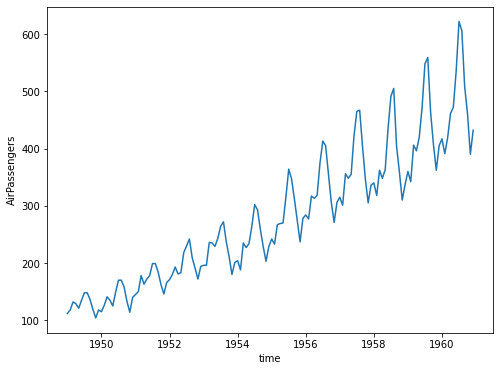

In [14]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df,x='time',y='AirPassengers')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

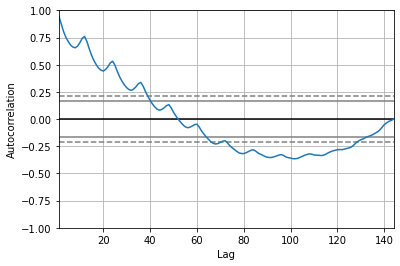

In [15]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['AirPassengers'])

/Users/lbedogni/repo/more-iot/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/lbedogni/repo/more-iot/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/lbedogni/repo/more-iot/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:          AirPassengers   No. Observations:                  144
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -689.067
Date:                Fri, 22 Oct 2021   AIC                           1390.135
Time:                        17:53:15   BIC                           1407.912
Sample:                             0   HQIC                          1397.358
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3223      0.097      3.334      0.001       0.133       0.512
ar.L2         -0.2170      0.078     -2.776      0.006      -0.370      -0.064
ar.L3         -0.0646      0.071     -0.915      0.3

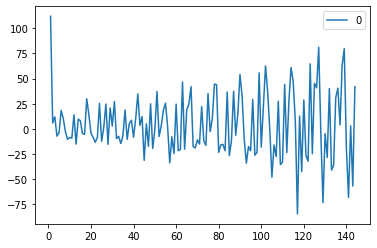

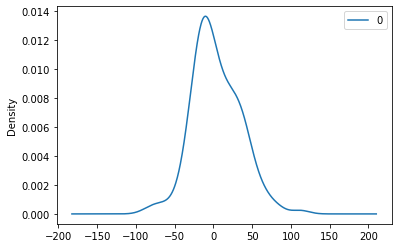

                0
count  144.000000
mean     3.893151
std     31.087159
min    -84.397612
25%    -16.548937
50%     -1.792613
75%     25.066151
max    112.000000


In [44]:
# fit an ARIMA model and plot residual errors
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(df['AirPassengers'], order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [116]:
Y = df['AirPassengers'].values
split = int(len(Y) * 0.8)
_train = Y[:split]
test = Y[split:len(Y)]
train = [x for x in _train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(train, order=(5,5,0))
	model_fit = model.fit()
	out = model_fit.forecast()
	predictions.append(out[0])
	obs = test[t]
	train.append(obs)
	print('predicted=%f, expected=%f' % (out[0], obs))

predicted=608.271039, expected=505.000000
predicted=448.560216, expected=404.000000
predicted=112.877727, expected=359.000000
predicted=330.674351, expected=310.000000
predicted=238.958166, expected=337.000000
predicted=570.155869, expected=360.000000
predicted=437.504726, expected=342.000000
predicted=300.263882, expected=406.000000
predicted=468.067230, expected=396.000000
predicted=292.652057, expected=420.000000
predicted=472.381615, expected=472.000000
predicted=529.008700, expected=548.000000
predicted=737.733313, expected=559.000000
predicted=463.563515, expected=463.000000
predicted=226.004693, expected=407.000000
predicted=307.069298, expected=362.000000
predicted=343.101370, expected=405.000000
predicted=638.650959, expected=417.000000
predicted=465.345121, expected=391.000000
predicted=341.370519, expected=419.000000
predicted=394.014474, expected=461.000000
predicted=520.837654, expected=472.000000
predicted=443.281293, expected=535.000000
predicted=662.010866, expected=622

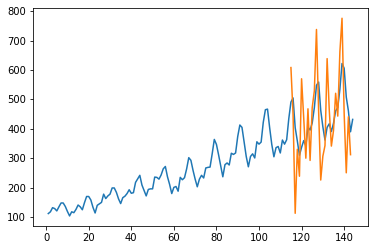

In [117]:
plt.plot(df['AirPassengers'])
plt.plot(range(split,len(Y)),predictions)

In [118]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(df['AirPassengers'][split:], predictions))
rmse


119.15139771136772

In [120]:
Y = df['AirPassengers'].values
split = int(len(Y) * 0.8)
_train = Y[:split]

df_result = pd.DataFrame()

for p in range(0,10,3):
    for d in range(0,5,2):
        for q in range(0,10,3):
            test = Y[split:len(Y)]
            train = [x for x in _train] 
            predictions = list()
            for t in range(len(test)):
                model = ARIMA(train, order=(p,d,q))
                model_fit = model.fit()
                out = model_fit.forecast()
                predictions.append(out[0])
                obs = test[t]
                train.append(obs)
            rmse = math.sqrt(mean_squared_error(df['AirPassengers'][split:], predictions))
            print(f"ARIMA({p},{d},{q}) - RMSE = {rmse}")

ARIMA(0,0,0) - RMSE = 196.1056670667055
ARIMA(0,0,3) - RMSE = 60.25255918540031
ARIMA(0,0,6) - RMSE = 59.06525885561807
ARIMA(0,0,9) - RMSE = 50.299736593126156
ARIMA(0,2,0) - RMSE = 61.16850665903639
ARIMA(0,2,3) - RMSE = 52.27162775000806
ARIMA(0,2,6) - RMSE = 44.64856958069435
ARIMA(0,2,9) - RMSE = 39.31483646272927
ARIMA(0,4,0) - RMSE = 152.81722235492927
ARIMA(0,4,3) - RMSE = 54.14749994999654
ARIMA(0,4,6) - RMSE = 62.94750073690335
